In [11]:
import numpy as np
import skimage
import pandas as pd

import pathlib
from pathlib import Path
from importlib import reload
import logging

import matplotlib.pyplot as plt


from pharynx_analysis import (
    pharynx_io as pio, image_processing as ip, experiment, plots
)

reload(pio);
reload(ip);
reload(experiment);

logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')

# Process Paired Experiments

In [63]:
seg0_bad = pio.load_tiff_from_disk('/Users/sean/code/wormAnalysis/python/tests/test_data/seg_0-bad.tif') == 0
seg0 = pio.load_tiff_from_disk('/Users/sean/code/wormAnalysis/python/tests/test_data/seg_0.tif')

In [78]:
from scipy import ndimage as ndi

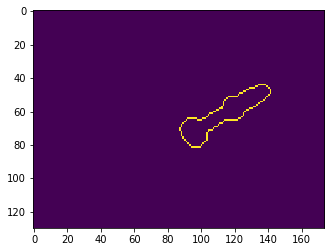

In [80]:
plt.imshow(np.logical_xor(seg0[0], ndi.binary_dilation(seg0[0])))

In [73]:
jaccard(seg0, seg0_bad)

0.6682828184387487

In [74]:
np.mean(
    list(jaccard(seg0[x].ravel(), seg0_bad[x].ravel()) for x in range(seg0.shape[0]))
)

0.6883231684873881

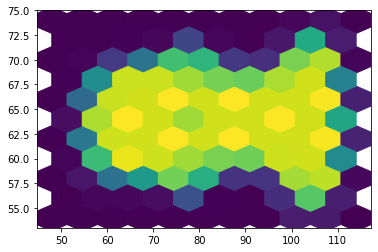

In [222]:
from skimage.measure import regionprops, label
from numpy.polynomial import Polynomial

# i = i + 1
xs, ys = [], []
for i in range(seg_0_rot.shape[0]):
    coords = regionprops(label(seg_0_rot[i]))[0].coords
    xs.append(coords[:, 1])
    ys.append(coords[:, 0])

xs = np.concatenate(xs)
ys = np.concatenate(ys)

c = []
w = []
for j in range(coords.shape[0]):
    c.append(fl0_rot[i][coords[j,0], coords[j, 1]])
    w.append(ndi.gaussian_filter(fl0_rot[i], sigma=5)[coords[j,0], coords[j, 1]])
c = np.asarray(c)

# plt.figure(figsize=(20,10))
plt.hexbin(xs, ys, gridsize=10)
# wmid = Polynomial.fit(xs, ys, 4, w=w)
# cmid = Polynomial.fit(xs, ys, 4, w=c)
# mid = Polynomial.fit(xs, ys, 4)
# plt.plot(*wmid.linspace(), color='r', label='blur weighted')
# plt.plot(*cmid.linspace(), color='k', label='weighted')
# plt.plot(*mid.linspace(), color='green', label='unweighted')
# plt.legend()

In [197]:
fl0_rot = pio.load_tiff_from_disk('/Users/sean/code/wormAnalysis/python/tests/test_data/fl_0_rot.tif')
seg_0_rot = pio.load_tiff_from_disk('/Users/sean/code/wormAnalysis/python/tests/test_data/seg_0_rot.tif')